# import modules for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Data Acquistion

In [2]:
df=pd.read_csv('Heart Disease.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [7]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

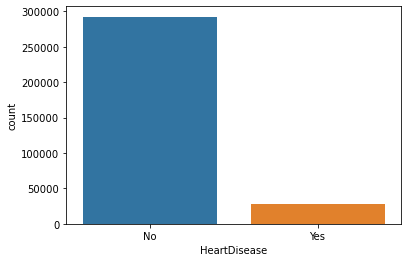

In [8]:
sns.countplot(x='HeartDisease',data=df)
plt.show

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

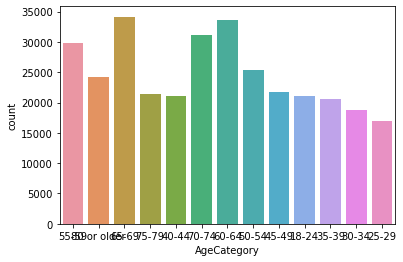

In [9]:
sns.countplot(x='AgeCategory',data=df)

In [10]:
#comparing HeartDisease column with AgeCategory column.
pd.crosstab(df['HeartDisease'],df['AgeCategory'])

AgeCategory,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older
HeartDisease,,,,,,,,,,,,,
No,20934,16822,18527,20254,20520,21047,23999,27555,30359,30050,26218,17433,18704
Yes,130,133,226,296,486,744,1383,2202,3327,4101,4847,4049,5449


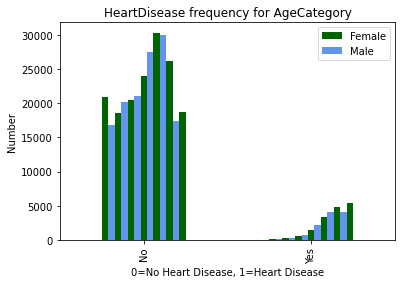

In [11]:
pd.crosstab(df['HeartDisease'],df['AgeCategory']).plot(kind='bar',color=['darkgreen','cornflowerblue'])
plt.title('HeartDisease frequency for AgeCategory')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Number')
plt.legend(['Female','Male']);

In [12]:
#comparing HeartDisease column with AgeCategory column.
pd.crosstab(df['HeartDisease'],df['DiffWalking'])

DiffWalking,No,Yes
HeartDisease,,
No,258040,34382
Yes,17345,10028


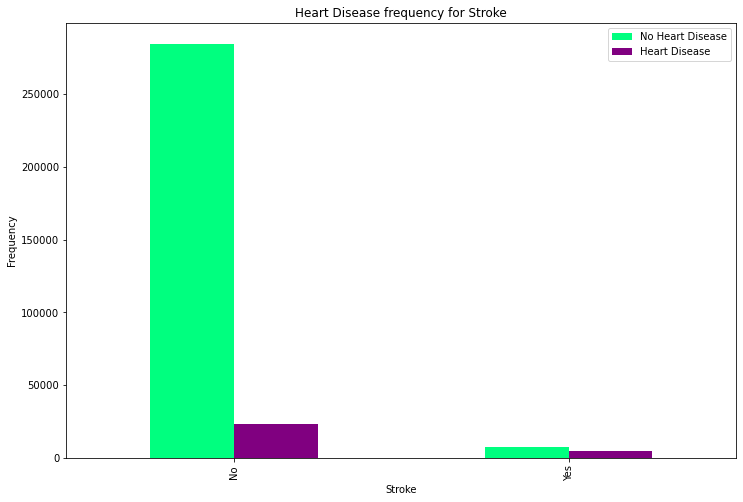

In [13]:
pd.crosstab(df['Stroke'],df['HeartDisease']).plot(kind='bar',
                                       figsize=(12,8),
                                       color=['springgreen','purple'])
plt.title('Heart Disease frequency for Stroke')
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.legend(['No Heart Disease','Heart Disease']);

In [14]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [15]:
#So, we have no missing values

# Encoding

In [16]:
from pandas.api.types import is_numeric_dtype
#cols=['AgeCategory','Race','Diabetic','GenHealth']
#for col in cols:
    #if is_numeric_dtype(df[col]):
        #continue
    #one = pd.get_dummies(df[col],drop_first=True) #prefix=['AgeCategory', 'Race','Diabetic','GenHealth']
    #df.drop(df[[col]],axis=1,inplace=True)
    #df=pd.concat([df,one], axis=1)
#df.head()    

In [17]:
from sklearn.preprocessing import LabelEncoder
#from pandas.core.dtype.common import is_numeric_dtype
le=LabelEncoder()

In [18]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    df[col]=le.fit_transform(df[col])

In [19]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [20]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [21]:
print(df.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
PhysicalActivity    0.100030
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
AlcoholDrinking     0.032080
MentalHealth        0.028591
GenHealth           0.011062
SleepTime           0.008327
Name: HeartDisease, dtype: float64


In [22]:
#This shows that most columns are moderately correlated with HeartDisease, but 'SleepTime' and 'GenHealth' is very weakly correlated. The original dataset of nearly 300 variables was reduced to just about 
#18 variables so we are not deleting any variable

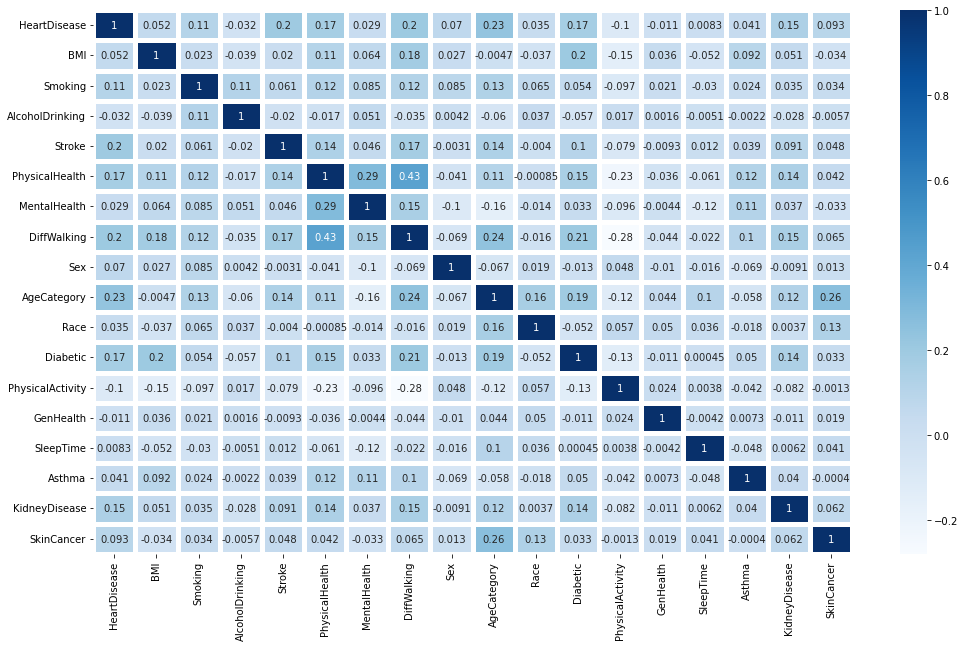

In [23]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True, fmt='.2g',linewidths=5, cmap='Blues')
plt.show()

In [24]:
#The corelation between the Data

# Checking Outliers in Dataset

<AxesSubplot:>

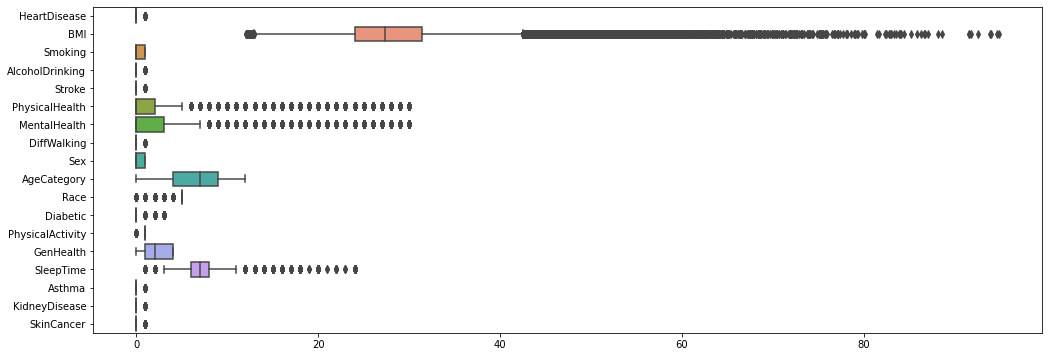

In [25]:
plt.figure(figsize=(17,6))
sns.boxplot(data=df, orient='h')

# Removing Outliers through IQR Method

In [26]:
#Outliers in BMI

In [27]:
#plt.figure(figsize=(10,3))
#sns.boxplot(df['BMI'])

In [28]:
#q1 = df['BMI'].quantile(0.25)
#q3 = df['BMI'].quantile(0.75)
#q1,q3

In [29]:
#IQR = q3 - q1
#IQR

In [30]:
#lower_limit = q1 - 1.5 * IQR
#upper_limit = q3 + 1.5 * IQR
#lower_limit,upper_limit

In [31]:
#df = df[(df['BMI'] > lower_limit) & (df['BMI'] < upper_limit)]
#plt.figure(figsize=(10,3))
#sns.boxplot(df['BMI'])

In [32]:
#df['BMI'].shape

<AxesSubplot:xlabel='SleepTime'>

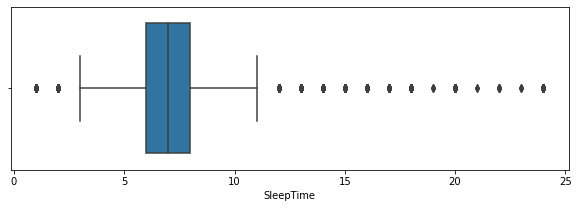

In [57]:
plt.figure(figsize=(10,3))
sns.boxplot(df['SleepTime'])

<AxesSubplot:xlabel='SleepTime'>

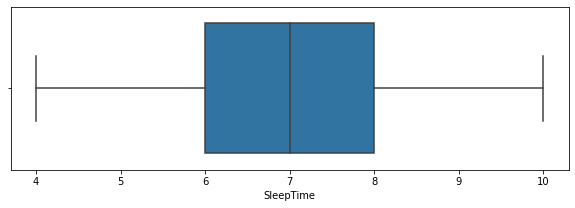

In [58]:
q1 = df['SleepTime'].quantile(0.25)
q3 = df['SleepTime'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df = df[(df['SleepTime'] > lower_limit) & (df['SleepTime'] < upper_limit)]
plt.figure(figsize=(10,3))
sns.boxplot(df['SleepTime'])

<AxesSubplot:>

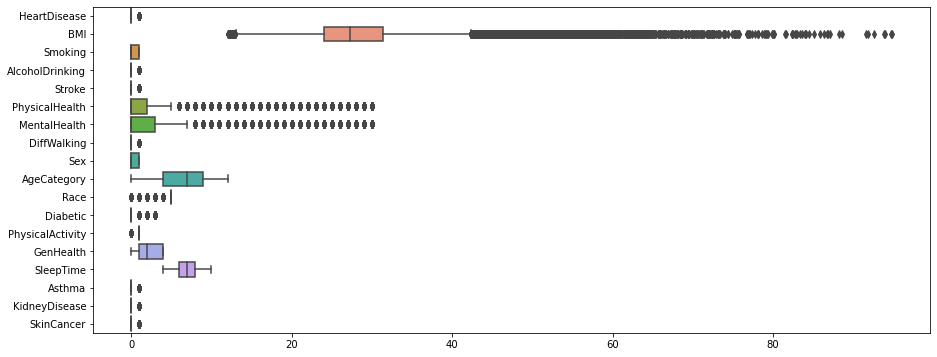

In [59]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, orient='h')

In [36]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


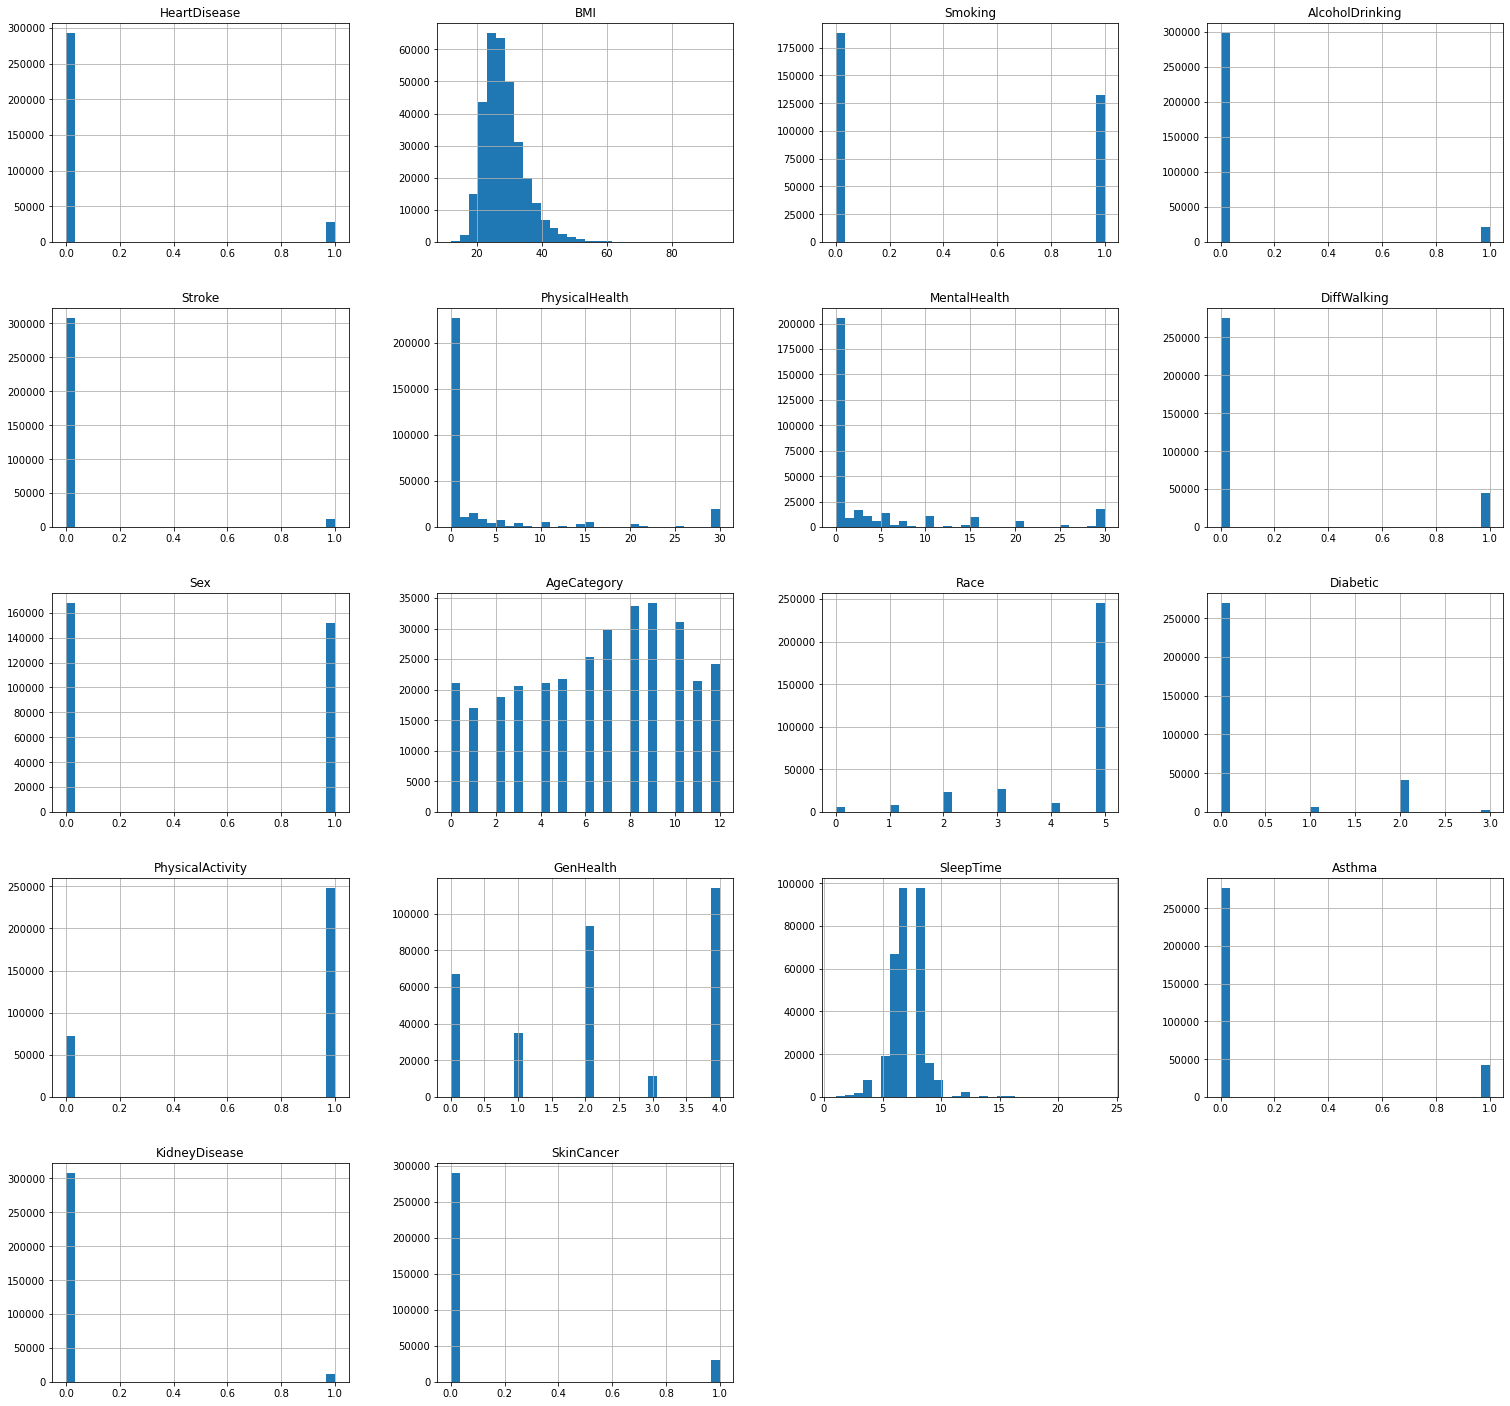

In [37]:
df.hist(bins=30,figsize=(26,25))
plt.show()

# Important Features

In [38]:
x=df.drop('HeartDisease', axis=1)
y=df['HeartDisease']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.30, random_state=1)

In [41]:
xtrain, xtest

(          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
 273582  43.40        0                0       0             2.0           5.0   
 54829   36.85        1                0       0            20.0           0.0   
 1482    35.70        0                0       0            25.0          25.0   
 17407   27.07        1                0       0             5.0          30.0   
 116646  25.02        0                0       0             5.0           0.0   
 ...       ...      ...              ...     ...             ...           ...   
 117583  23.96        1                0       0             0.0           0.0   
 73349   28.62        1                0       0             0.0           0.0   
 312201  19.53        1                0       0            30.0           0.0   
 267336  25.39        0                0       0             0.0           5.0   
 128037  25.77        0                0       0             0.0           4.0   
 
         DiffW

In [42]:
y.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [43]:
#there is much imbalance data

In [44]:
xtrain.shape,ytrain.shape

((223856, 17), (223856,))

In [45]:
xtest.shape, ytest.shape

((95939, 17), (95939,))

# Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression().fit(xtrain,ytrain)

In [67]:
y_pred_lr=lr.predict(xtest)

In [68]:
pd.DataFrame(np.c_[ytest,y_pred_lr],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,0
...,...,...
95934,0,0
95935,0,0
95936,0,0
95937,1,0


In [49]:
lr.coef_

array([[ 0.01542839,  0.46940492, -0.54137849,  1.16185027,  0.022734  ,
         0.00962673,  0.31119821,  0.66419081,  0.28989735, -0.00185549,
         0.26182855, -0.23706923, -0.04260624, -0.04114588,  0.24011526,
         0.76479235,  0.01611677]])

In [50]:
lr.intercept_

array([-5.62469137])

In [56]:
score=lr.score(xtrain,ytrain)
print('training score:', score)

training score: 0.9147577013794582


In [55]:
score=lr.score(xtest,ytest)
print('testing score:', score)

testing score: 0.9151961141975631


In [69]:
from sklearn.metrics import accuracy_score
score_lr = accuracy_score(ytest,y_pred_lr)
score_lr

0.9151961141975631

# Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm=confusion_matrix(ytest,y_pred)

In [76]:
cm

array([[87062,   734],
       [ 7402,   741]], dtype=int64)

<AxesSubplot:>

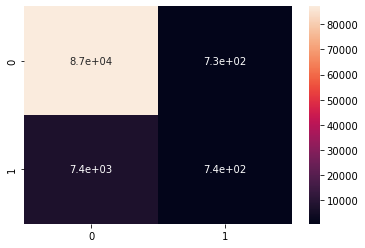

In [77]:
sns.heatmap(cm, annot=True)

In [79]:
tp, fn, fp, tn = confusion_matrix(ytest,y_pred).reshape(-1)


In [80]:
tp, fn, fp, tn


(87062, 734, 7402, 741)